## Question 1: Make a graph of the mortality values (by age group, year, and country income group). Focus on the rates and intervals.

Answer: Please check the output of the code cell below

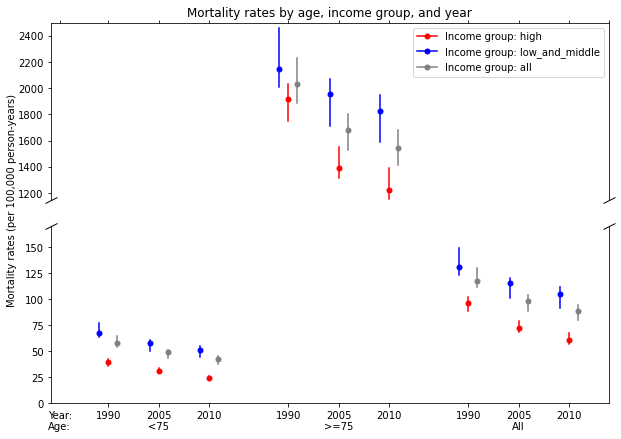

In [1]:
import pandas as pd
from itertools import product
from collections import OrderedDict

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

# load dataframe
df = pd.read_csv('feigin2014_table1_mortality.csv')

# some plotting parameters
gap_income = 0.05 # space between income subgroups
# customize xticks
str_year_list = ['Year:\nAge:', '1990','2005\n<75', '2010', '1990','2005\n>=75', '2010',\
                '1990','2005\nAll', '2010', '']
width_tick = 0.28
ticks_list = [0.45]+[i+1 for n in range(3) for i in [n-width_tick, n, n+width_tick]]+[3.5]

# assign each AgeYear pair to a position on x axis
AgeYear_pair = list(product(['<75','>=75','all'], [1990,2005,2010]))
dic_AgeYear_xtick = {k:v for k,v in zip(AgeYear_pair, ticks_list[1:-1])}

# set up figures
plt.rcParams["figure.figsize"] = (10,7)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.15)  # adjust space between axes

ax1.set_title('Mortality rates by age, income group, and year')
ax1.set_ylim(1150., 2500.)  # large values
ax2.set_ylim(0., 170.)  # small values
ax1.set_xlim(0.4, 3.5)
ax2.set_xlim(0.4, 3.5)
ax1.set_xticks(ticks_list)
ax1.set_xticklabels(str_year_list)
ax1.set_xticks(ticks_list)
ax2.set_xticklabels(str_year_list)
ax1.set_ylabel('Mortality rates (per 100,000 person-years)')
ax1.yaxis.set_label_coords(-0.06,0)
ax2.xaxis.get_ticklines()[-2].set_visible(False)
ax2.xaxis.get_ticklines()[0].set_visible(False)
ax1.xaxis.tick_top() # add ticks on the top to help understanding

# add points and intervals
for _, row in df.iterrows():
    xtick_YearAge = dic_AgeYear_xtick[(row.age_group, row.year)] # xaxis location by YearAge
    interval_color = 'red'
    # adjust x position and set up different colors for income subgroups
    if row.income_group == 'low_and_middle':
        xtick_YearAge -= gap_income
        interval_color = 'blue'
    elif row.income_group == 'all':
        xtick_YearAge += gap_income
        interval_color = 'grey'
    # high mortality in the upper and low mortality in the lower
    if row.mortality_rate > 1150:
        ax1.plot((xtick_YearAge),(row.mortality_rate), marker='o', color=interval_color, markersize=5,\
                label=f"Income group: {row.income_group}")
        ax1.plot((xtick_YearAge,xtick_YearAge),(row.interval_low,row.interval_high),\
                 '-',color=interval_color)
    else:
        ax2.plot((xtick_YearAge),(row.mortality_rate), marker='o', color=interval_color, markersize=5,\
                label=f"Income group: {row.income_group}")
        ax2.plot((xtick_YearAge,xtick_YearAge),(row.interval_low,row.interval_high),\
                 '-',color=interval_color)

# hide the spines between ax1 and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(labeltop=False)

# make broken y-axis
d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0,1], [0,0], transform=ax1.transAxes, **kwargs)
ax2.plot([0,1], [1,1], transform=ax2.transAxes, **kwargs)

# legends
handles, labels = ax1.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys())
# show
plt.show()

## Question 2: Discuss your design choices.

Answer: There are two challenges in making this plot: 
1. The mortality rates need to be compared by three factors; 
2. The mortality rates are distributed at different scales. The >=75 age groups have rates over 1000 and other groups are below 150.

I assume the plot is supposed to be published in a paper so that 3D/interactive plot is not considered because they are not practical in 2Ds. To tackle the first challenge, I set a two-level x-axis for age and year and use different colors to present the income group. The age is selected as the first level because my eyeball check finds that age>=75 is greatly related to higher mortality rates. Placing age subgroups in the same clusters can emphasize such a difference. The year is selected as the second level on x-axis is because it is more straightforward to visualize the temporal trends. Then I use red and blue to distinguish the high and low-middle income groups and a neutral color (grey) to present the "all" income group.

For the second challenge, I thought about applying log transformation but it will lose discrimination within age subgroups. My solution is to use a broken y-axis to skip the range that does not include any data points.

From this plot, we can tell that age >=75, the earlier years, and the low_and_middle income group are related to higher mortality rates.

## Question 3: How would you make a comprehensive graph that includes all of the information in the table?

Answer: Because other measures such as mortality-to-incidence ratios and DALYs have different units and scales compared to mortality rates, I would use separated subplots to visualize each measure.